# IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the data
tweets_df = pd.read_csv('train.csv')

In [3]:
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [4]:
tweets_df.tweet

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [5]:
tweets_df = tweets_df.drop(['id'] , axis=1)  #asis means that we are droping the entire column

In [6]:
tweets_df


,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


# this clear heatmap shows us that the dataset is clean and does not have any null value for tweets


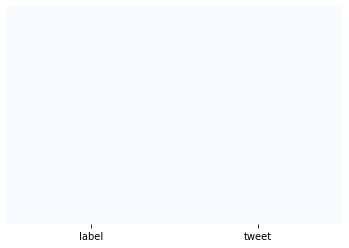

In [7]:
 sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

# This histogram shows us the range of the dataset  The tweets with label of 0 are positive and the tweets with label of 1 are negative


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016B172477C0>,
      dtype=object)

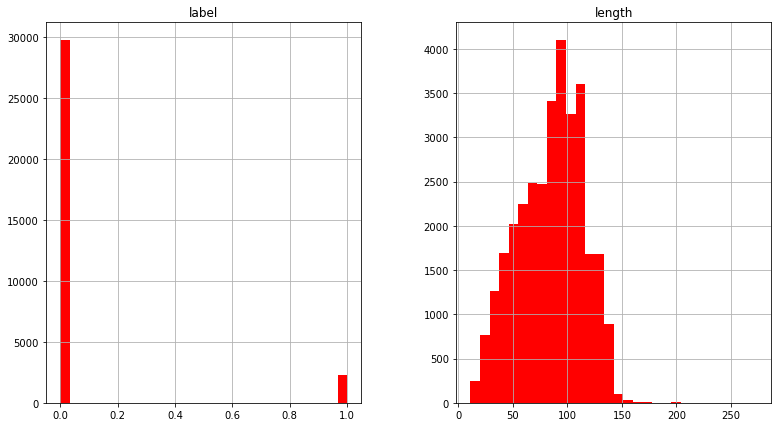

In [73]:
# fig, ax = plt.subplots(figsize=(10,10)) 
tweets_df.hist(bins = 30, figsize = (13,7), color = 'r')

In [9]:
# Let's get the length of the messages
tweets_df['length'] = tweets_df.tweet.apply(len)

In [10]:
tweets_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


# This histogram gives us the range of the lengeth fo the tweets in the dataset

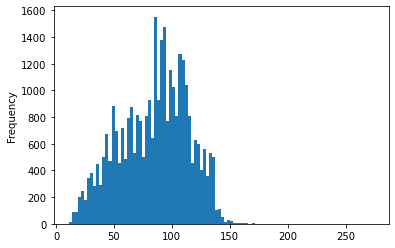

In [74]:
# fig, ax = plt.subplots(figsize=(20,20)) 
tweets_df['length'].plot(bins=100, kind='hist') 


In [12]:
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [13]:
# Let's see the shortest message 
tweets_df[tweets_df['length'] == 11]['tweet'].iloc[0]

'i love you '

In [14]:
# This is one of the longest tweet
tweets_df[tweets_df['length'] == 84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [15]:
# Classifying all the positive tweets in a dataframe
positive_df = tweets_df[tweets_df['label']==0]

In [16]:
positive_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [17]:
# All the negative tweets in a dataframe
negative_df = tweets_df[tweets_df['label']==1]

In [18]:
negative_df

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


In [19]:
# Converting all the tweets into a list 
sentences = tweets_df['tweet'].tolist()

In [1]:
# sentences

In [21]:
len(sentences) #which would again give us the number of tweets in that list

31962

In [22]:
# Joining all the tweets into one string
sentences_as_one_string = " ".join(sentences)

In [2]:
# sentences_as_one_string

 Now What we would Like to do is that draw a word cloud of the positive and the negative dataframes to get a understanding on how the dataframe is overall looking like

Combined Data

In [24]:
# # !pip install WordCloud
from wordcloud import WordCloud

# plt.figure(figsize=(20,20))
# plt.imshow(WordCloud().generate(sentences_as_one_string))

Positive data

In [25]:
positive_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [26]:
positive_sen = positive_df.tweet.tolist()

In [27]:
positive_string = " ".join(positive_sen)

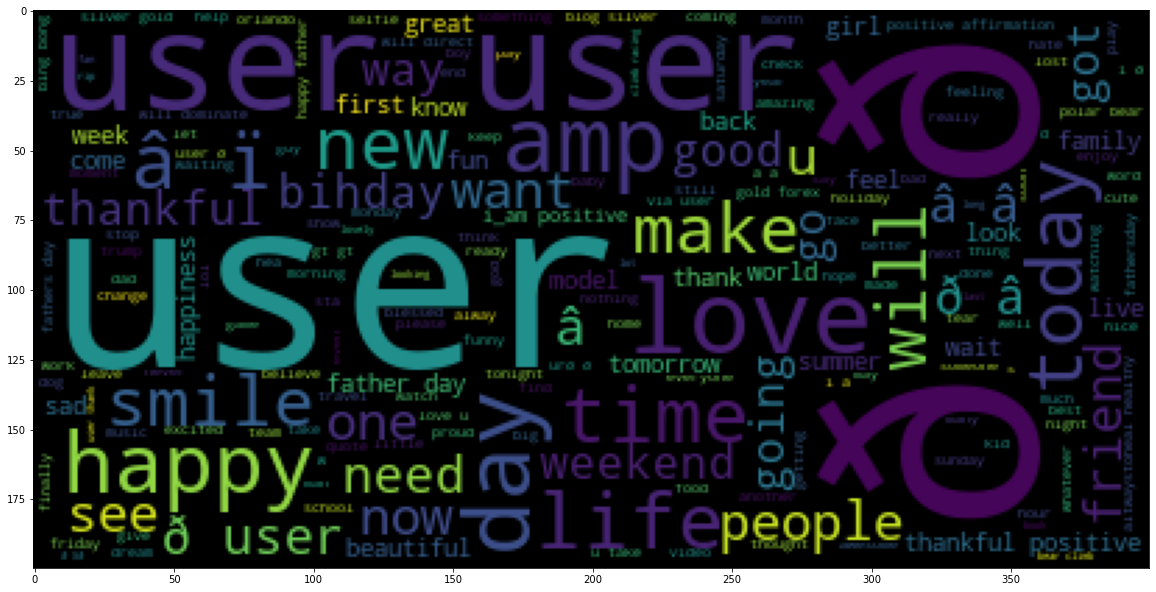

In [28]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(positive_string))

Negative Data

In [29]:
negative_df

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


In [30]:
negative_sen = negative_df.tweet.tolist()

In [31]:
negative_string = " ".join(negative_sen)

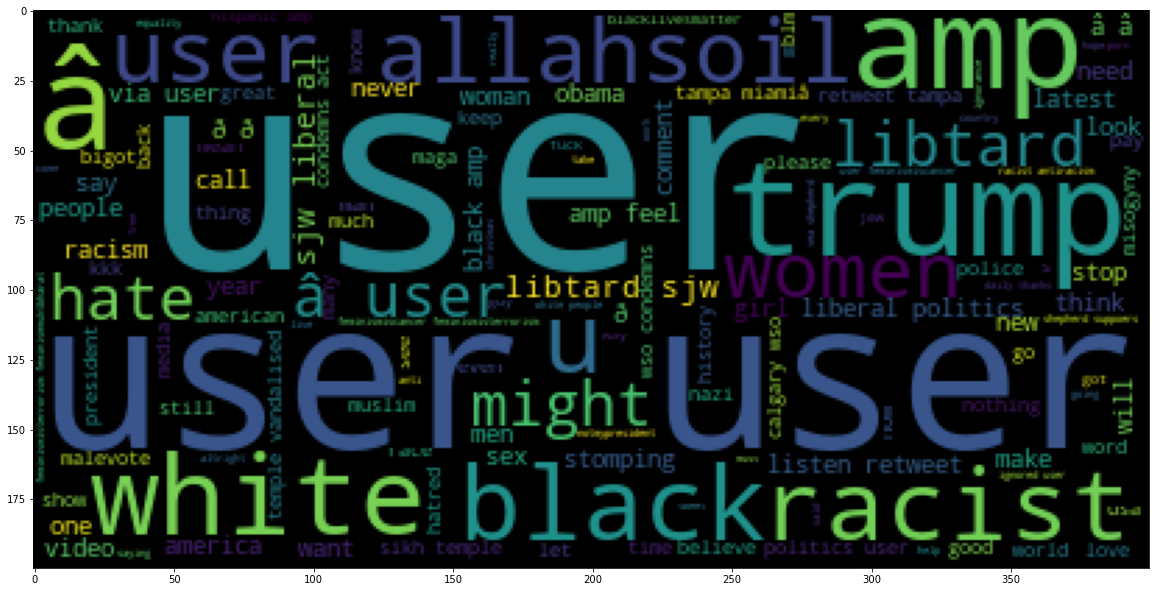

In [32]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_string))

#  CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

In [33]:
import string
import nltk # Natural Language tool kit 
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to C:\Users\Shubham
[nltk_data]     Khatri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [35]:
# Let's test the newly added function
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [36]:
print(tweets_df_clean[5]) # show the cleaned up version

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [37]:
print(tweets_df['tweet'][5]) # show the original version

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [39]:
tweets_countvectorizer.shape

(31962, 47386)

In [40]:
X = tweets_countvectorizer

In [41]:
Y = tweets_df['label']

In [3]:
# print(vectorizer.get_feature_names())


In [43]:
print(tweets_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [44]:
tweets_countvectorizer.shape

(31962, 47386)

In [45]:
tweets = pd.DataFrame(tweets_countvectorizer.toarray())


#  TRAIN A NAIVE BAYES CLASSIFIER MODEL

In [46]:
X.shape

(31962, 47386)

In [47]:
Y.shape

(31962,)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [49]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, Y_train)

MultinomialNB()

#  ASSESS TRAINED MODEL PERFORMANCE  

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

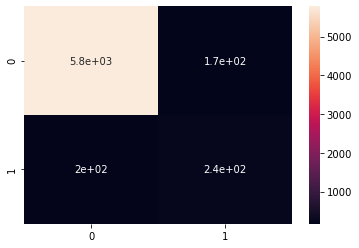

In [75]:
# Predicting the Test set results
# fig, ax = plt.subplots(figsize=(18,20)) 
Y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_predict_test)
sns.heatmap(cm, annot=True)

In [77]:
print(classification_report(Y_test, Y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5948
           1       0.59      0.55      0.57       445

    accuracy                           0.94      6393
   macro avg       0.78      0.76      0.77      6393
weighted avg       0.94      0.94      0.94      6393

